# Model selection 

In [31]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import warnings

In [15]:
# Load clean predictor and target sets
X = pd.read_pickle('/Users/alyssaliguori/fis/projects/data/predictors.pickle')
y = pd.read_pickle('/Users/alyssaliguori/fis/projects/data/target.pickle')

In [16]:
# print shape
print('Predictor shape:',X.shape, '\n',
      'Target shape:', y.shape, '\n')

Predictor shape: (39644, 51) 
 Target shape: (39644,) 



## Using train_test_split

In [17]:
# split train data and test data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y
                                                   ) 

In [18]:
# scale using train data and transform test data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# call models 
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
##svm = SVC(kernel='linear')

# fit to train data 
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
##svm.fit(X_train, y_train)

# predict test values 
y_hat_knn = knn.predict(X_test)
y_hat_rf = rf.predict(X_test)
##y_hat_svm = svm.predict(X_test)

/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
# score models on test data 
score_knn = accuracy_score(y_test, y_hat_knn)
score_rf = accuracy_score(y_test, y_hat_rf)
##score_svm = accuracy_score(y_test, y_hat_svm)
print('KNN test score:', round(score_knn, 5))
print('RF test score:', round(score_rf, 5))
##print('SVM test score:', score_svm)

KNN test score: 0.84374
RF test score: 0.85294


## Using cross-validation

In [29]:
knn_pipe = Pipeline([('scale', StandardScaler()),
                     ('knn', KNeighborsClassifier())
                    ])
rf_pipe = Pipeline([('scale', StandardScaler()),
                    ('rf', RandomForestClassifier())
                   ])

In [26]:
scores_knn = cross_val_score(knn_pipe, X, y, cv=5, scoring='accuracy')
print('KNN scores:', scores_knn, '\n')

KNN scores: [0.84993695 0.84108967 0.84134191 0.8413219  0.83842079] 



In [34]:
scores_rf = cross_val_score(rf_pipe, X, y, cv=5, scoring='accuracy')
print('Random forest scores:', scores_rf)
warnings.filterwarnings('ignore')

Random forest scores: [0.84035309 0.85130533 0.8537016  0.85191726 0.85380928]


In [41]:
print('knn cv mean:', scores_knn.mean(),'\n',
      'rf cv mean:', scores_rf.mean())

knn cv mean: 0.8424222425459922 
 rf cv mean: 0.8502173129890103


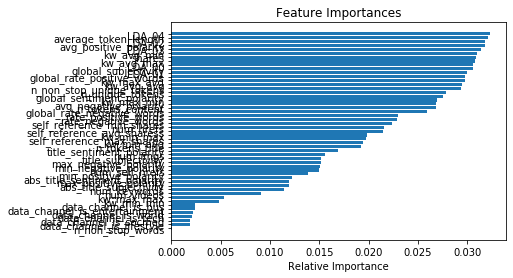

0.032351158352786936


In [59]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# max feature importance 
print(importances.max())

## Using gridsearch cross-validation

In [ ]:
search = GridSearchCV()